In [5]:
print('aaa')

aaa


In [6]:
import csv
import matplotlib.pyplot as plt
from typing import Dict
import random
import math
class Student:
    def __init__(self, tutorial_group: str, student_id: str, school: str,
                 name: str, gender: str, cgpa: float, team: int):

        self.tutorial_group = tutorial_group
        self.student_id = student_id
        self.school = school
        self.name = name
        self.gender = gender
        self.cgpa = cgpa
        self.team = team

    def __str__(self):
        return (f'{self.tutorial_group}, Student ID: {self.student_id}, School: {self.school},'
                  f'Name:{self.name}, Gender: {self.gender}, CGPA: {self.cgpa}, Team: {self.team}')

class Team_group:
    def __init__(self, tutorial_group: str):
        self.tutorial_group = tutorial_group
        self.students_of_team = []

    def __str__(self):
        student_list = "\n".join(str(student) for student in self.students_of_team)
        return f'Group: {self.tutorial_group}\n{student_list}'

    def add_student(self, student: Student):
        self.students_of_team.append(student)

    def remove_student(self, student: Student):
        self.students_of_team.remove(student)

    def get_average_cgpa(self) -> float:
        total_cgpa = sum(student.cgpa for student in self.students_of_team)
        return total_cgpa/len(self.students_of_team)

    def get_team_score(self):
        res = 0
        for i in range(len(self.students_of_team)):
            for j in range(i + 1, len(self.students_of_team)):
                res += diversity_score(self.students_of_team[i], self.students_of_team[j], 1,1,1)
        return res



class Tutorial_group:
    def __init__(self, group_id: str):
        self.group_id = group_id
        self.students = []
        self.teams = []

    def __str__(self):
        student_list = "\n".join(str(student) for student in self.students)
        return f'Tutorial Group: {self.group_id}\nStudents:\n{student_list}\n'

    def add_student(self, student: Student):
        self.students.append(student)

    def add_team(self, team: Team_group):
        self.teams.append(team)

    def get_group_score(self):
        res = 0
        for team in self.teams:
            res += team.get_team_score()
        return res

    def get_max_cgpa(self):
        return max(student.cgpa for student in self.students)

    def get_min_cgpa(self):
        return min(student.cgpa for student in self.students)

    def get_average_cgpa(self) -> float:
        total_cgpa = sum(student.cgpa for student in self.students)
        return total_cgpa/len(self.students)


students_by_groups: Dict[str, Tutorial_group] = {}
student_by_id: Dict[str, Student] = {}

def read_csv(file_path):
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            tutorial_group = row[0]
            student_id = row[1]
            school = row[2]
            name = row[3]
            gender = row[4]
            cgpa = float(row[5])
            if tutorial_group not in students_by_groups:
                students_by_groups[tutorial_group] = Tutorial_group(tutorial_group)
            students_by_groups[tutorial_group].add_student(Student(tutorial_group, student_id, school,
                                                                   name, gender, cgpa, 0))
            student_by_id[student_id] = Student(tutorial_group, student_id, school,
                                                                   name, gender, cgpa, 0)
file_path = 'records.csv'
read_csv(file_path)
# for group_id, tutorial in students_by_groups.items():
#     print(f'Group: {group_id}')
#     for student in tutorial.students:
#         print(student)
#     print()

def dividing_group(students_by_groups: Dict[str, Tutorial_group] = {}):
    for group, tutorial in students_by_groups.items():
        for i in range(0, 50, 5):
            temp_team = Team_group(group)
            for j in range(i, i + 5):
                temp_team.add_student(tutorial.students[j])
                tutorial.students[j].team = int(i/5+1)
            tutorial.add_team(temp_team)
dividing_group(students_by_groups)

for group_id, tutorial in students_by_groups.items():
    print(f'Group: {group_id}')
    for i in range(len(tutorial.teams)):
        print(f'Team: {i+1}')
        for student in tutorial.teams[i].students_of_team:
            print(student)
    print()

diff_cgpa = []
diff_result = []
impact = []

def diversity_score(A: Student, B: Student, w_s: float, w_g: float, w_c: float) -> float:
    # A and B are in the same team and group
    res = 0
    # If the school is not the same, then add w_s^2 to the result
    if A.school != B.school:
        res += w_s * w_s
    # If the gender is not the same, then add w_g^2 to the result
    d_gender = 0
    if A.gender != B.gender:
        d_gender = w_g * w_g
    elif A.gender == B.gender and A.gender == "Female":
        d_gender += w_g * w_g / 4

    # CGPA Diversity Score
    Group: Tutorial_group = students_by_groups[A.tutorial_group]

    d_cgpa = abs(A.cgpa - B.cgpa) / (Group.get_max_cgpa() - Group.get_min_cgpa())
    d_avg = 0
    # CGPA Mean Score
    if A.team and A.team in Group.teams:
        Team: Team_group = Group.teams[A.team]

        avg_team = Team.get_average_cgpa()
        avg_group = Group.get_average_cgpa()
        d_avg = abs(avg_team - avg_group) / (Group.get_max_cgpa() - Group.get_min_cgpa())
    else:
        d_avg = 0

    diff = d_cgpa * 0.5 - d_avg * 1.5 + 1.5
    diff /= 3 / 2
    diff *= w_c
    diff_cgpa.append(diff)
    res = res + d_gender * d_gender + diff * diff
    diff_result.append(math.sqrt(res))
    impact.append((diff * diff, res))
    return math.sqrt(res)



Group: G-1
Team: 1
G-1, Student ID: 5002, School: CCDS,Name:Aarav Singh, Gender: Male, CGPA: 4.02, Team: 1
G-1, Student ID: 3838, School: EEE,Name:Aarti Nair, Gender: Female, CGPA: 4.05, Team: 1
G-1, Student ID: 2091, School: EEE,Name:Adlan Bin Rahman, Gender: Male, CGPA: 4.2, Team: 1
G-1, Student ID: 288, School: CoB (NBS),Name:Ajay Verma, Gender: Male, CGPA: 4.01, Team: 1
G-1, Student ID: 4479, School: CCDS,Name:Amelia Kim, Gender: Female, CGPA: 4.11, Team: 1
Team: 2
G-1, Student ID: 5708, School: SoH,Name:Ananya Ramesh, Gender: Male, CGPA: 4.2, Team: 2
G-1, Student ID: 4563, School: WKW SCI,Name:Anjali Patel, Gender: Female, CGPA: 4.01, Team: 2
G-1, Student ID: 3989, School: WKW SCI,Name:Anthony Liu, Gender: Male, CGPA: 4.15, Team: 2
G-1, Student ID: 2115, School: EEE,Name:Anya Kumar, Gender: Female, CGPA: 4.03, Team: 2
G-1, Student ID: 1383, School: CoB (NBS),Name:Areeba Khan, Gender: Female, CGPA: 4.19, Team: 2
Team: 3
G-1, Student ID: 1417, School: CoE,Name:Darren Lee, Gender: Ma

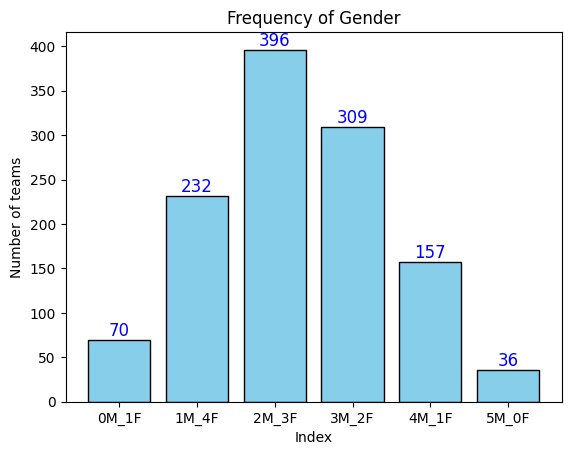

In [7]:
def frequency_gender(group: Tutorial_group):
    count_m2_f3 = 0
    count_m3_f2 = 0
    count_m1_f4 = 0
    count_m4_f1 = 0
    count_m5_f0 = 0
    count_m0_f5 = 0
    for group_id, tutorial in group.items():
      for i in range (len(tutorial.teams)):
        male = 0
        female = 0
        for student in tutorial.teams[i].students_of_team:
            if student.gender == "Male":
                male +=1
            if student.gender == "Female":
                female +=1
        if male == 2 and female == 3:
          count_m2_f3 +=1
        elif male == 3 and female == 2:
          count_m3_f2 +=1
        elif male == 1 and female == 4:
          count_m1_f4 +=1
        elif male == 4 and female == 1:
          count_m4_f1 +=1
        elif male == 5 and female == 0:
          count_m5_f0 +=1
        elif male == 0 and female == 5:
          count_m0_f5 +=1
    return[count_m0_f5, count_m1_f4, count_m2_f3, count_m3_f2, count_m4_f1, count_m5_f0]

data = frequency_gender(students_by_groups)
x_labels = ["0M_1F", "1M_4F", "2M_3F", "3M_2F", "4M_1F", "5M_0F"]
plt.bar(x_labels, data, color='skyblue', edgecolor='black')
plt.title("Frequency of Gender")
plt.xlabel("Index")
plt.ylabel("Number of teams")
plt.xticks(ticks=range(len(data)), labels=x_labels)
for i, value in enumerate(data):
    plt.text(i, value, str(value), ha="center", va="bottom", fontsize=12, color="blue")

plt.show()

[1, 9, 150, 545, 495]


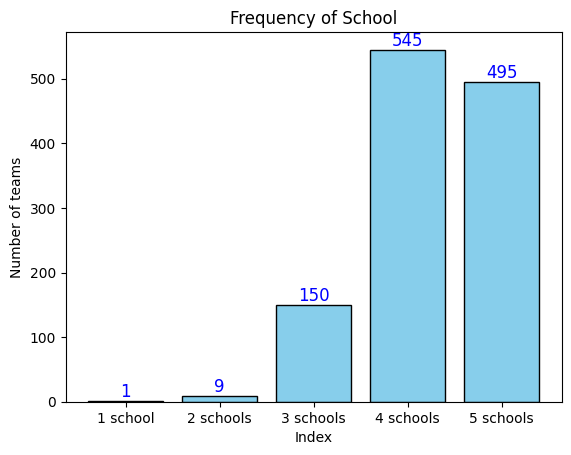

In [8]:
def frequency_school(group: Tutorial_group):
    school_1 = 0    #nums of teams in which all students from 1 school
    school_2 = 0    #nums of teams in which all students from 2 school
    school_3 = 0    #nums of teams in which all students from 3 school
    school_4 = 0    #nums of teams in which all students from 4 school
    school_5 = 0    #nums of teams in which all students from 5 school

    for group_id, tutorial in group.items():
      for i in range (len(tutorial.teams)):
        school = []
        for student in tutorial.teams[i].students_of_team:
          if student.school not in school:
            school.append(student.school)
        if len(school) ==1:
            school_1 += 1
        elif len(school) ==2:
            school_2 += 1
        elif len(school) ==3:
            school_3 += 1
        elif len(school) ==4:
            school_4 += 1
        elif len(school) ==5:
            school_5 += 1
    return[school_1, school_2, school_3, school_4, school_5]

print(frequency_school(students_by_groups))
data = frequency_school(students_by_groups)
x_labels = ["1 school", "2 schools", "3 schools", "4 schools", "5 schools"]
plt.bar(x_labels, data, color='skyblue', edgecolor='black')
plt.title("Frequency of School")
plt.xlabel("Index")
plt.ylabel("Number of teams")
plt.xticks(ticks=range(len(data)), labels=x_labels)
for i, value in enumerate(data):
    plt.text(i, value, str(value), ha="center", va="bottom", fontsize=12, color="blue")

plt.show()

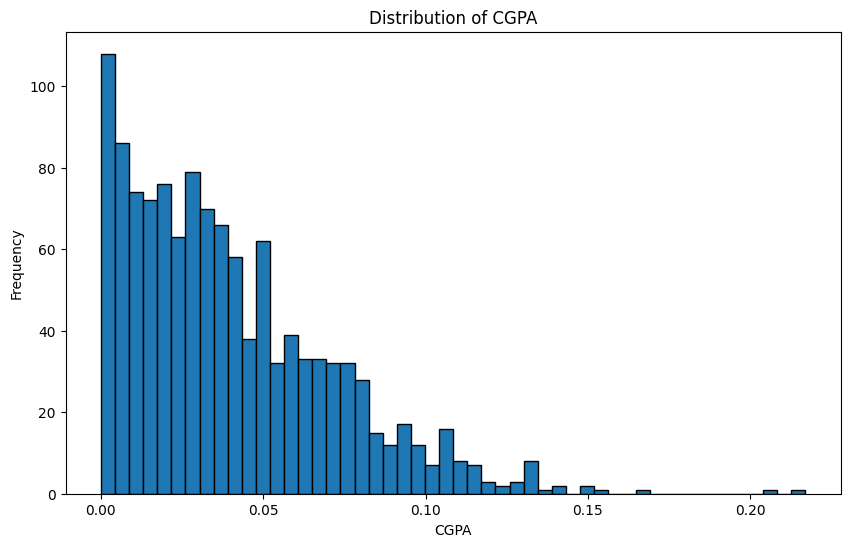

In [9]:
def frequency_cgpa(group: Tutorial_group):
  team_cnt = 0
  frequency = []
  for group_id, tutorial in group.items():
      team_cnt += 10
      for i in range (len(tutorial.teams)):
        avg_team = tutorial.teams[i].get_average_cgpa()
        avg_group = tutorial.get_average_cgpa()
        frequency.append(abs(avg_team-avg_group))
  return frequency

data = frequency_cgpa(students_by_groups)

# Plotting the distribution of d_cgpa
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, edgecolor='black')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def swap(A: Student, B: Student):
    ref_A = A.team
    ref_B = B.team
    A.team = B.team
    B.team = ref_A
    students_by_groups[A.tutorial_group].teams[ref_A-1].remove_student(A)
    students_by_groups[A.tutorial_group].teams[ref_A-1].add_student(B)
    students_by_groups[B.tutorial_group].teams[ref_B-1].remove_student(B)
    students_by_groups[B.tutorial_group].teams[ref_B-1].add_student(A)

# swap(student_by_id['5002'], student_by_id['5708'])

# for group_id, tutorial_group in students_by_groups.items():
#     print(f'Score of group: {group_id}')
#     for team in tutorial_group.teams:
#         print(team.get_team_score())
#     print(f'Total score: {tutorial_group.get_group_score()}')
#     print()

def local_improve(swap_student: Student):
    improve = False
    group: Tutorial_group = students_by_groups[swap_student.tutorial_group]
    group_score = group.get_group_score()
    for team in group.teams:
        for student in team.students_of_team:
            if student.team != swap_student.team:
                swap(swap_student, student)
                current_group_score = group.get_group_score()
                if current_group_score > group_score:
                    group_score = current_group_score
                    improve = True
                else:
                    swap(swap_student, student)
    return improve

def group_improve(group: Tutorial_group):
    group_score = group.get_group_score()
    for student in group.students:
        while local_improve(student):
            pass
        else:
            continue
    group_score = group.get_group_score()

# group_improve(students_by_groups['G-100'])
for group, tutorial_group in students_by_groups.items():
    group_improve(tutorial_group)
    print()

for group_id, tutorial in students_by_groups.items():
    print(f'Group: {group_id}')
    for i in range(len(tutorial.teams)):
        print(f'Team: {i+1}')
        for student in tutorial.teams[i].students_of_team:
            print(student)
            print('*')
    print()




























































































































Group: G-1
Team: 1
G-1, Student ID: 1075, School: CoB (NBS),Name:Felix Yip, Gender: Male, CGPA: 4.08, Team: 1
*
G-1, Student ID: 1841, School: MAE,Name:Jett Morales, Gender: Male, CGPA: 4.12, Team: 1
*
G-1, Student ID: 4563, School: WKW SCI,Name:Anjali Patel, Gender: Female, CGPA: 4.01, Team: 1
*
G-1, Student ID: 659, School: SSS,Name:Maria Ivanovna, Gender: Female, CGPA: 4.2, Team: 1
*
G-1, Student ID: 3838, School: EEE,Name:Aarti Nair, Gender: Female, CGPA: 4.05, Team: 1
*
Team: 2
G-1, Student ID: 809, School: CoB (NBS),Name:Nisha Das, Gender: Female, CGPA: 4.26, Team: 2
*
G-1, Student ID: 235, School: CCDS,Name:Ming Zhang, Gender: Male, CGPA: 4.06, Team: 2
*
G-1, Student ID: 2151, School: EEE,Name:Mei Hong, Gender: Female, CGPA: 4.02, Team: 2
*
G-1, Student ID: 4657, School: SoH,Name:Oleg Petrovich, Gender: Male, CGPA: 4.0, Team: 2
*
G-1, Student ID: 5703, School: 

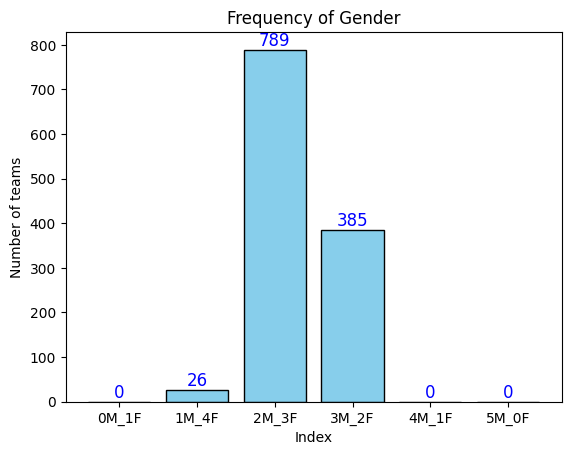

In [11]:

data = frequency_gender(students_by_groups)
x_labels = ["0M_1F", "1M_4F", "2M_3F", "3M_2F", "4M_1F", "5M_0F"]
plt.bar(x_labels, data, color='skyblue', edgecolor='black')
plt.title("Frequency of Gender")
plt.xlabel("Index")
plt.ylabel("Number of teams")
plt.xticks(ticks=range(len(data)), labels=x_labels)
for i, value in enumerate(data):
    plt.text(i, value, str(value), ha="center", va="bottom", fontsize=12, color="blue")

plt.show()


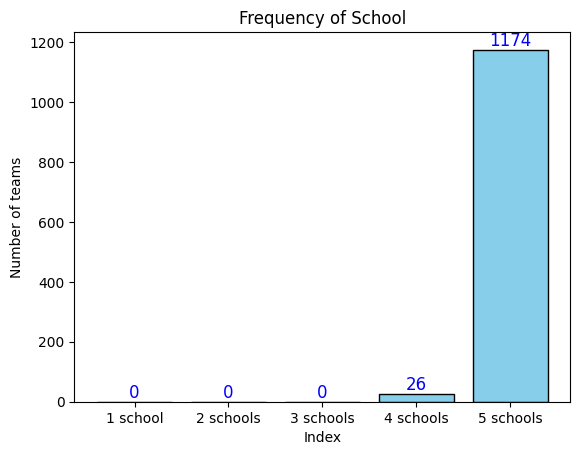

In [12]:
data = frequency_school(students_by_groups)
x_labels = ["1 school", "2 schools", "3 schools", "4 schools", "5 schools"]
plt.bar(x_labels, data, color='skyblue', edgecolor='black')
plt.title("Frequency of School")
plt.xlabel("Index")
plt.ylabel("Number of teams")
plt.xticks(ticks=range(len(data)), labels=x_labels)
for i, value in enumerate(data):
    plt.text(i, value, str(value), ha="center", va="bottom", fontsize=12, color="blue")

plt.show()


1200


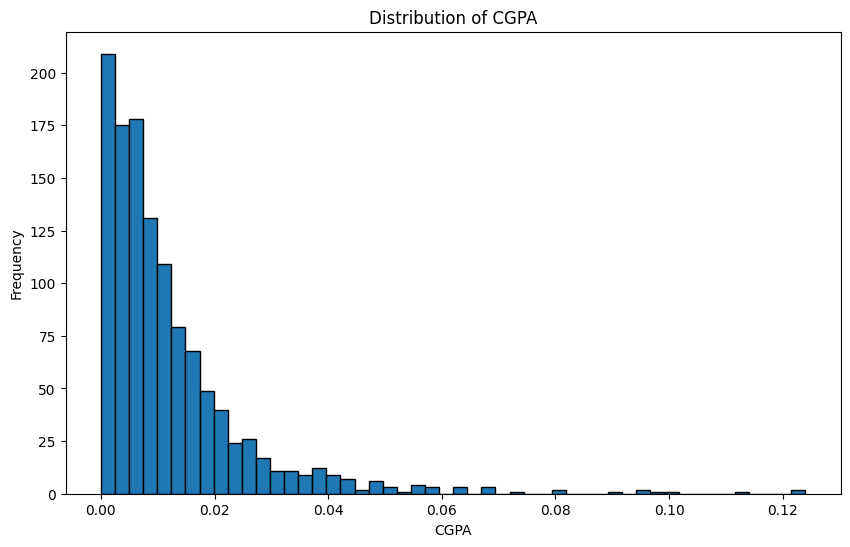

In [13]:
data = frequency_cgpa(students_by_groups)
print(len(data))
# Plotting the distribution of d_cgpa
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, edgecolor='black')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

